In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata ####################
# Processing Method
# Color
# Species (arabica / robusta)
################### Farm Metadata ####################
# Country of Origin
# Altitude

df_quality = df_quality[['Country.of.Origin', 'Altitude', 'Processing.Method', 'Species', 'Color', 'Aroma', 'Flavor',
                         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# null values in data
df_quality.isnull().sum()

Country.of.Origin         1
Altitude                226
Processing.Method       170
Species                   0
Color                   218
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

## Select your features (columns)

In [5]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1338 non-null   object 
 1   Altitude              1113 non-null   object 
 2   Processing.Method     1169 non-null   object 
 3   Species               1339 non-null   object 
 4   Color                 1121 non-null   object 
 5   Aroma                 1339 non-null   float64
 6   Flavor                1339 non-null   float64
 7   Aftertaste            1339 non-null   float64
 8   Acidity               1339 non-null   float64
 9   Body                  1339 non-null   float64
 10  Balance               1339 non-null   float64
 11  Uniformity            1339 non-null   float64
 12  Clean.Cup             1339 non-null   float64
 13  Sweetness             1339 non-null   float64
 14  Moisture              1339 non-null   float64
 15  Category.One.Defects 

#### Imbalanced Dataset

In [6]:
df_quality['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Vietnam                           8
Myanmar                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador                     

In [7]:
df_countries = df_quality[['Country.of.Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                           'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 
                           'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]
df_countries.dropna(inplace=True)

C:\Users\Abraham\anaconda3\envs\python31\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# Set features. This will also be used as your x values.
data = df_countries.values
X = data[:, 1:12]
y = data[:, 0]
print(X.shape, y.shape)

(1338, 11) (1338,)


## Create a Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model using SVC

In [11]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.397196261682243
Testing Data Score: 0.33955223880597013


## Evaluate the Model

In [12]:
from sklearn.metrics import accuracy_score

# Make predictions with the hypertuned model
predictions = model.predict(X_test_scaled)  
# Calculate classification report
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 33.96%


### Confusion Matrix

Confusion matrix:
 [[ 2  0  5  0  0  0  0  4  0  0  0  0  0  0  0 12  0  0  0  1  0  0  0  0
   1  0  0  0]
 [ 1  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 5  0 29  1  0  0  1  2  0  0  1  0  0  0  0  5  1  0  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  1  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0]
 [ 2  0  2  0  0  0  0 17  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  5  0  1  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0]
 [

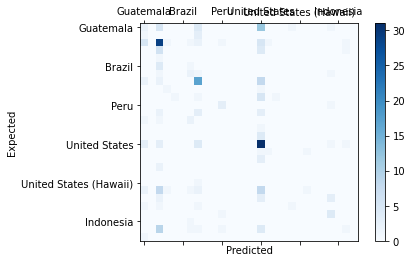

In [13]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = df_countries['Country.of.Origin'].unique()
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Decision Tree Model

In [14]:
from sklearn import tree

# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_countries.iloc[:, 1:12], df_countries['Country.of.Origin'])
clf.score(df_countries.iloc[:, 1:12], df_countries['Country.of.Origin'])

1.0

In [16]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=df_countries.iloc[:, 1:12].columns,  
    class_names=df_countries['Country.of.Origin'].unique(),  
    filled=True, rounded=True,
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('coffee_quality_countries.png')

graph = graphviz.Source(dot_data)  
graph 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307311 to fit



In [18]:
predictions = clf.predict(X_test_scaled)

df_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
df_predictions.head(50)

,Prediction,Actual
0,Mexico,Guatemala
1,Mexico,Mexico
2,Mexico,Mexico
3,Mexico,Mexico
4,Mexico,Mexico
5,Mexico,India
6,Mexico,"Tanzania, United Republic Of"
7,Mexico,Colombia
8,Mexico,Guatemala
9,Mexico,Brazil
